In [45]:
import pandas as pd
import numpy as np

from datetime import datetime, timedelta

In [52]:
weather_df = pd.read_csv("data/weather_data.csv", parse_dates=["Date"])
columns_to_keep = list(weather_df.columns)
columns_to_keep.pop(0)
weather_df = weather_df.loc[weather_df["Township"] == "T024R01W5", columns_to_keep]
weather_df.head(3)

,Date,Air Temp. Min. (°C),Precip. (mm)
3499,2013-01-01,-8.54,0.0
3500,2013-01-02,-10.54,0.0
3501,2013-01-03,-7.53,0.0


In [53]:
weather_df = weather_df.set_index("Date")

In [54]:
weather_df.head(3)

,Air Temp. Min. (°C),Precip. (mm)
Date,,
2013-01-01,-8.54,0.0
2013-01-02,-10.54,0.0
2013-01-03,-7.53,0.0


In [119]:
shelter_df = pd.read_csv("data/2013-2022-emergency-shelter-occupancy-machine-readable.csv", parse_dates=["Date"])
# manually add the missing value for the Brenda House 2022-04-01 capacity
shelter_df.loc[(shelter_df["Date"] == "2022-04-01") & (shelter_df["ShelterName"] == "Brendas House"), "Capacity"] = 60
shelter_df.head(3)

/var/folders/sy/lsfn4dnx0x75hhnpd76qp_c40000gn/T/ipykernel_97904/1626330343.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  shelter_df = pd.read_csv("data/2013-2022-emergency-shelter-occupancy-machine-readable.csv", parse_dates=["Date"])


,Date,City,ShelterType,ShelterName,Organization,Shelter,Capacity,Overnight,Daytime,YEAR,MONTH
0,2013-04-01,Edmonton,Women Emergency,WEAC,WEAC,,75,65,,2013,4
1,2013-04-01,Edmonton,Intox,Hope Mission - Intox Centre,Hope Mission,Intox Centre,70,74,,2013,4
2,2013-04-01,Edmonton,Adult Emergency,Hope Mission - Herb Jamieson Centre,Hope Mission,Herb Jamieson Centre,250,253,,2013,4


In [120]:
shelter_df = shelter_df.loc[shelter_df["City"] == "Calgary", ["City", "Date", "ShelterName", "Capacity", "Overnight"]]
# shelter_df["Capacity"].astype("int64")

In [121]:
shelter_df.head()

,City,Date,ShelterName,Capacity,Overnight
17,Calgary,2013-04-01,River Front,725,700
18,Calgary,2013-04-01,River Front - Winter Emergency,140,90
19,Calgary,2013-04-01,River Front - Short Term Supportive,270,262
20,Calgary,2013-04-01,Hillhurst Centre,125,117
21,Calgary,2013-04-01,Wagner Centre,23,12


In [122]:
shelter_df["Capacity"] = shelter_df["Capacity"].astype("int32")

In [107]:
shelter_df.loc[shelter_df["Capacity"] == " "]

,City,Date,ShelterName,Capacity,Overnight


In [108]:
a = shelter_df.set_index("Date").loc[["2022-03-29", "2022-03-30", "2022-03-31", "2022-04-01", "2022-04-02", "2022-04-03"]]
a.loc[a["ShelterName"] == "Brendas House"]

,City,ShelterName,Capacity,Overnight
Date,,,,
2022-03-29,Calgary,Brendas House,60,45
2022-03-30,Calgary,Brendas House,60,50
2022-03-31,Calgary,Brendas House,60,50
2022-04-01,Calgary,Brendas House,60,45
2022-04-02,Calgary,Brendas House,60,41
2022-04-03,Calgary,Brendas House,60,41


In [123]:
shelter_df["Overnight"] = shelter_df["Overnight"].astype("int32")

In [110]:
shelter_df.dtypes

City                   object
Date           datetime64[ns]
ShelterName            object
Capacity                int32
Overnight               int32
dtype: object

In [111]:
# shelter_df["occupancy_rate"] = shelter_df["Overnight"] / shelter_df["Capacity"]

In [112]:
# shelter_df.head(3)

,City,Date,ShelterName,Capacity,Overnight,occupancy_rate
17,Calgary,2013-04-01,River Front,725,700,0.965517
18,Calgary,2013-04-01,River Front - Winter Emergency,140,90,0.642857
19,Calgary,2013-04-01,River Front - Short Term Supportive,270,262,0.970370


In [125]:
shelter_df.head(3)

,City,Date,ShelterName,Capacity,Overnight
17,Calgary,2013-04-01,River Front,725,700
18,Calgary,2013-04-01,River Front - Winter Emergency,140,90
19,Calgary,2013-04-01,River Front - Short Term Supportive,270,262


In [129]:
shelter_df = shelter_df.groupby("Date").sum(["Capacity", "Overnight"])

In [130]:
shelter_df["occupancy_rate"] = shelter_df["Overnight"] / shelter_df["Capacity"]

In [131]:
shelter_df.head()

,Capacity,Overnight,occupancy_rate
Date,,,
2013-04-01,2575,2285,0.887379
2013-04-02,2575,2250,0.873786
2013-04-03,2575,2365,0.918447
2013-04-04,2575,2307,0.895922
2013-04-05,2575,2221,0.862524


In [149]:
joined_df = weather_df.join(shelter_df, how="inner")

In [150]:
joined_df.head()

,Air Temp. Min. (°C),Precip. (mm),Capacity,Overnight,occupancy_rate
Date,,,,,
2013-04-01,-4.31,0.00,2575,2285,0.887379
2013-04-02,-3.08,0.00,2575,2250,0.873786
2013-04-03,-0.96,0.22,2575,2365,0.918447
2013-04-04,-2.49,0.00,2575,2307,0.895922
2013-04-05,-3.17,0.00,2575,2221,0.862524


<AxesSubplot:xlabel='Air Temp. Min. (°C)', ylabel='occupancy_rate'>

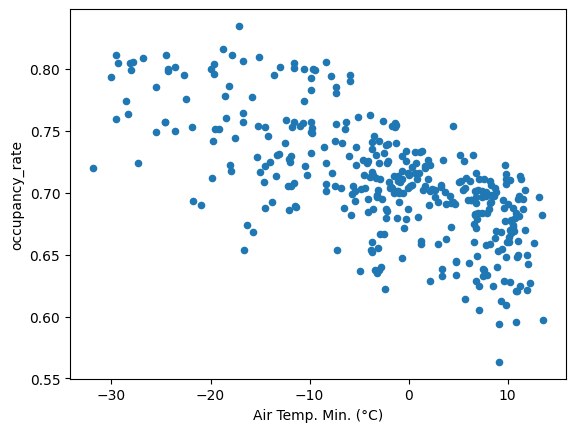

In [152]:
# joined_df["Air Temp. Min. (°C)"] = (joined_df["Air Temp. Min. (°C)"] - joined_df["Air Temp. Min. (°C)"].min()) / (joined_df["Air Temp. Min. (°C)"].max() - joined_df["Air Temp. Min. (°C)"].min())
# joined_df.loc[joined_df.index.dt.year == 2019, ["Air Temp. Min. (°C)", "occupancy_rate"]].plot()
a = joined_df.reset_index()
a.loc[a["Date"].dt.year == 2019, ["Air Temp. Min. (°C)", "occupancy_rate"]].plot(kind="scatter", x = "Air Temp. Min. (°C)", y = "occupancy_rate")

<AxesSubplot:xlabel='Precip. (mm)', ylabel='occupancy_rate'>

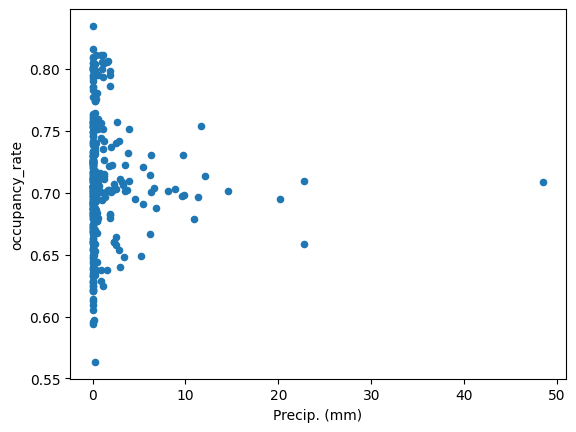

In [153]:
a.loc[a["Date"].dt.year == 2019, ["Precip. (mm)", "occupancy_rate"]].plot(kind="scatter", x = "Precip. (mm)", y = "occupancy_rate")

<AxesSubplot:xlabel='Precip. (mm)', ylabel='occupancy_rate'>

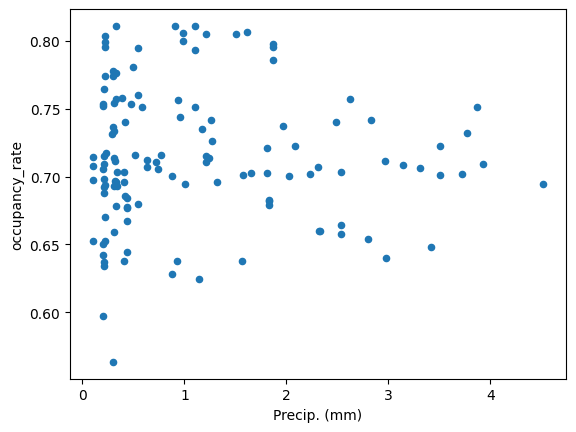

In [155]:
a.loc[(a["Date"].dt.year == 2019) & (a["Precip. (mm)"] < 5) & (a["Precip. (mm)"] > 0), ["Precip. (mm)", "occupancy_rate"]].plot(kind="scatter", x = "Precip. (mm)", y = "occupancy_rate")

In [168]:
a["prev_temp"] = a["Air Temp. Min. (°C)"].shift(-1) - a["Air Temp. Min. (°C)"].min() + 1
a["temp_chain_index"] = (a["Air Temp. Min. (°C)"] - a["Air Temp. Min. (°C)"].min() + 1) / a["prev_temp"]
a["temp_chain_index"]

0       0.961646
1       0.937994
2       1.046846
3       1.021263
4       1.026975
          ...   
3372    0.964864
3373    0.962403
3374    1.008752
3375    1.004509
3376         NaN
Name: temp_chain_index, Length: 3377, dtype: float64

<AxesSubplot:>

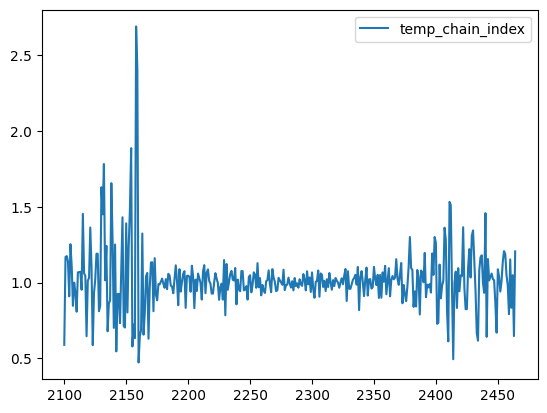

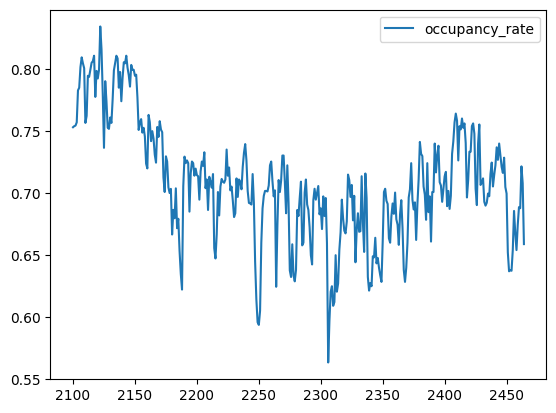

In [169]:
a.loc[a["Date"].dt.year == 2019, ["temp_chain_index"]].plot()
a.loc[a["Date"].dt.year == 2019, ["occupancy_rate"]].plot()

Things to do:
* additional filtering to eliminate non-homeless shelters (emergency)
* look into the significance of winter shelters

* look into the shift between occupancy rate and temperature (days = 0, 1, 3, 7)

* create plots for 2021

* correlation coeff and regression line 